In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from math import ceil
from scipy.stats import norm

In [5]:
path_to_file = '../Projects/Grocery Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

In [7]:
# dataset description
xl.parse('Fact Summary')  

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [8]:
xl1 = xl.parse('Grosto DB')

In [9]:
# ensuring that all columns are displayed
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100

# Data Cleaning and Validation

In [10]:
display(xl1.head(), xl1.tail(), xl1.dtypes, xl1.shape)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,Woodlands,Singapore,Frozen,Frozen Meat,Minced Pork,Betagro,320 g,3.10,2,0.02,6.0760,74.1664,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,Woodlands,Singapore,"Dairy, Chilled & Eggs",Deli & Cooked Meat,Straky Bacon,Citterio,240 g,5.44,2,0.03,10.5536,10.5536,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,Woodlands,Singapore,Kitchen & Dining,BBQ Supplies,Swee! Disposable bamboo chopsticks,Swee!,203 per pack,3.97,1,0.01,3.9303,14.0184,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,Woodlands,Singapore,Bakery & Breakfast,"Jams, Honey & Spreads",Squeezy organic honey,Adams,453g,4.10,1,0.01,4.0590,14.0184,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820
50446,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,42,62,Female,Woodlands,Singapore,Frozen,Ice Cream,Picard Nut ice cream,Picard,400 ml,6.09,1,0.01,6.0291,14.0184,0.07,14.999688,Card,BDO Unibank,0.107,0.15,0.743,0.65163,0.9135,4.52487


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

(50447, 32)

In [16]:
xl1['Mobile Number'] = xl1['Mobile Number'].astype(str)

In [17]:
xl1.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                  object
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [69]:
# checking for null values
xl1.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [19]:
# checking for duplicates
xl1[xl1.duplicated(keep=False)]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.933,7.866,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


These are two identical products in one transaction, the Net Bill Amount is calculated for 2 products, so I don't count it as a duplicate and keep it.

In [73]:
xl1['Year'].unique()

array([2016, 2017, 2018, 2019])

In [92]:
print(sorted(xl1['Age'].unique()))

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [366]:
xl1['Country'].unique()

array(['Indonesia', 'Malaysia', 'Philippines', 'Singapore'], dtype=object)

In [111]:
xl1.groupby('Country')['City'].unique().apply(', '.join)

Country
Indonesia               Jakarta
Malaysia           Kuala Lumpur
Philippines              Manila
Singapore      Bedok, Woodlands
Name: City, dtype: object

In [114]:
xl1['Category'].unique()

array(['Choco, Snacks, Sweets', 'Wines, Beers & Spirits',
       'Fruit & Vegetable', 'Pet Care', 'Meat & Seafood', 'Mother & Baby',
       'Bakery & Breakfast', 'Household', 'Beverages', 'Beauty',
       'Dairy, Chilled & Eggs', 'Frozen', 'Kitchen & Dining',
       'Party Supplies', 'Rice & Cooking Essentials', 'Health'],
      dtype=object)

# Business Questions

**1.** People of which Age Group are the most frequent buyers?

In [20]:
xl1['Age Group'] = pd.cut(xl1['Age'], bins=[15, 18, 35, 45, 65, 75], labels=['15-18', '18-35', '35-45', '45-65', '65-75'])

In [87]:
most_frequent_age = xl1.pivot_table(index='Age Group', columns='Country', values='Receipt Number', aggfunc='nunique')
display(most_frequent_age.style.background_gradient(axis=0))

Country,Indonesia,Malaysia,Philippines,Singapore
Age Group,,,,
15-18,197,323,272,397
18-35,850,1289,1161,1849
35-45,548,532,588,1047
45-65,686,566,917,1199
65-75,72,85,86,127


- In all countries there is such a trend that young people aged 18-35 make purchases most often, so it is worth focusing on their consumer behavior. 
- The highest concentration of buyers is in Singapore, so I'll go a bit deeper in further analysis of purchases in this country.

**2.** What are the top 5 Product Categories among young people aged 18-35 in Singapore?

In [34]:
filtered_singapore = xl1[(xl1['Age Group'] == '18-35') & (xl1['Country'] == 'Singapore')]

top_categories = filtered_singapore.groupby('Category')['Receipt Number'].count().reset_index()

top_5_categories = top_categories.sort_values(by='Receipt Number', ascending=False).head(5)
top_5_categories.rename(columns={'Receipt Number': 'Count'}, inplace=True)

top_5_categories

,Category,Count
0,Bakery & Breakfast,894
5,Frozen,878
6,Fruit & Vegetable,730
1,Beauty,687
13,Pet Care,530


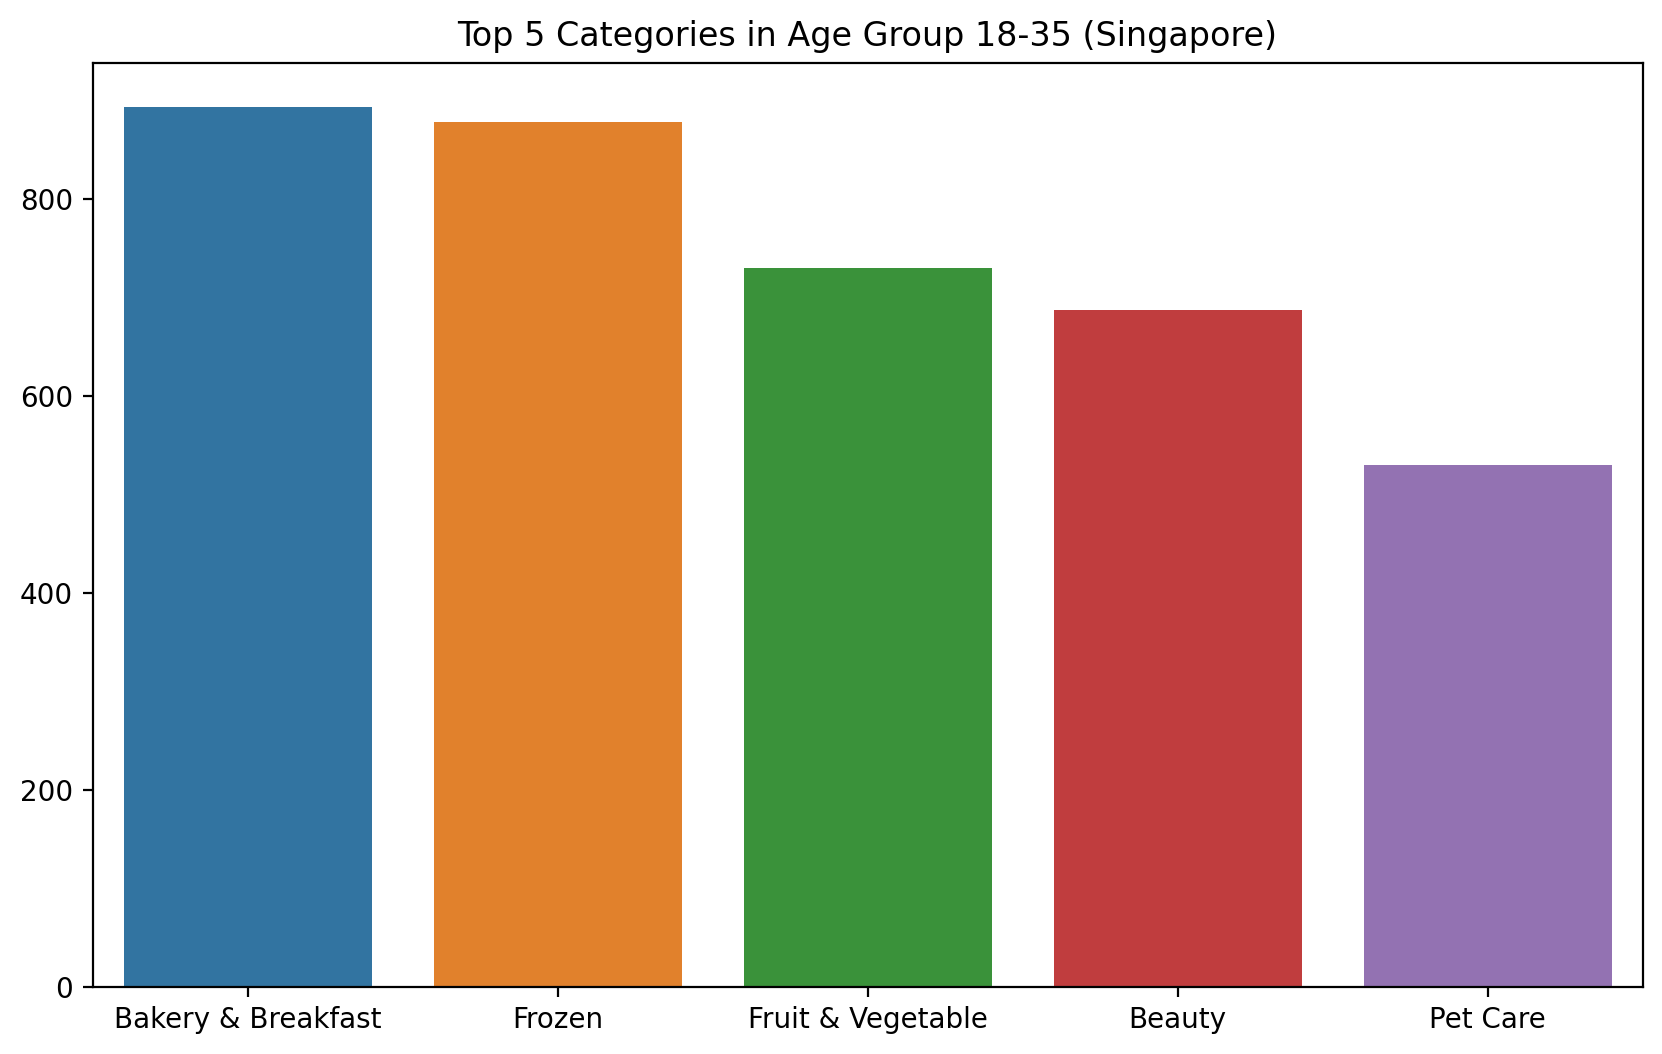

In [37]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=top_5_categories, x='Category', y='Count')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Top 5 Categories in Age Group 18-35 (Singapore)');

**3.** What is the top 1 Product in each Age Group by country?

In [40]:
grouped_items = xl1.groupby(['Country', 'Age Group', 'Items'])['Receipt Number'].count().reset_index()

top_items = grouped_items.loc[grouped_items.groupby(['Country', 'Age Group'])['Receipt Number'].idxmax()]

top_items.pivot_table(index='Country', columns='Age Group', values='Items', aggfunc='first')

Age Group,15-18,18-35,35-45,45-65,65-75
Country,,,,,
Indonesia,PEDIGREE Adult complete nuritition dog food,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Ashai Lager Beer,Ashai Lager Beer
Malaysia,Alpo Chicken pate dog food,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Anchor salted pure butter,Anchor salted pure butter
Philippines,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Sainsbury salted tortilla chips,Lamb pate dog food,Pore pack black
Singapore,Anchor salted pure butter,Sainsbury salted tortilla chips,Lamb pate dog food,Ashai Lager Beer,ThyGrace Holland potato


- It is especially worth noting that in all countries the most popular product in the 18-35 Age Group is ʼSainsbury salted tortilla chipsʼ.
- The same product is popular in all countries, except for Singapore, in the 35-45 Age Group. 
- In Indonesia middle-aged and elderly people most often buy ʼAshai Lager Beerʼ and in Malaysia - ʼAnchor salted pure butterʼ.

**4.** What is the distribution of sales by country?

In [41]:
# selecting rows with unique Receipt Numbers for a more reliable distribution
unique_receipts = xl1.drop_duplicates(subset=['Receipt Number'], keep='first')

unique_receipts

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Age Group
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,35-45
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,45-65
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,15-18
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.10,23.317140,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968,18-35
12,GIJ00005,2016-01-03,2016,1,15:47:23.141000,9873085193,MIDID0005,1,49,Male,Jakarta,Indonesia,Meat & Seafood,Fresh Meat,Hego Fresh chicken thigh,Hego,780 g,6.45,1,0.05,6.1275,6.1275,0.10,6.740250,Cash,Philippine National bank,0.088,0.15,0.762,0.56760,0.9675,4.91490,45-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50435,GSW01531,2019-12-28,2019,12,19:32:00.690000,9832560017,MIDSG0284,21,20,Male,Woodlands,Singapore,Beverages,coffee,Redmart coffee beans,Redmart,520 g,10.92,2,0.03,21.1848,21.1848,0.07,22.667736,Card,Philtrust Bank,0.073,0.15,0.777,1.59432,3.2760,16.96968,18-35
50436,GSW01532,2019-12-28,2019,12,10:19:30.769000,9865690417,MIDSG0518,13,35,Female,Woodlands,Singapore,Kitchen & Dining,BBQ Supplies,Kingsford BBQ charcoal,Kingsford,103 per pack,4.85,2,0.03,9.4090,9.4090,0.07,10.067630,Cash,ING Bank,0.109,0.15,0.741,1.05730,1.4550,7.18770,18-35
50437,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,15,28,Female,Woodlands,Singapore,Frozen,Frozen Vegetables,Sweet Corn,Erum,470 g,4.66,2,0.02,9.1336,74.1664,0.07,79.358048,Card,Philippine National bank,0.124,0.15,0.726,1.15568,1.3980,6.76632,18-35
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,Woodlands,Singapore,"Dairy, Chilled & Eggs",Deli & Cooked Meat,Straky Bacon,Citterio,240 g,5.44,2,0.03,10.5536,10.5536,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,18-35


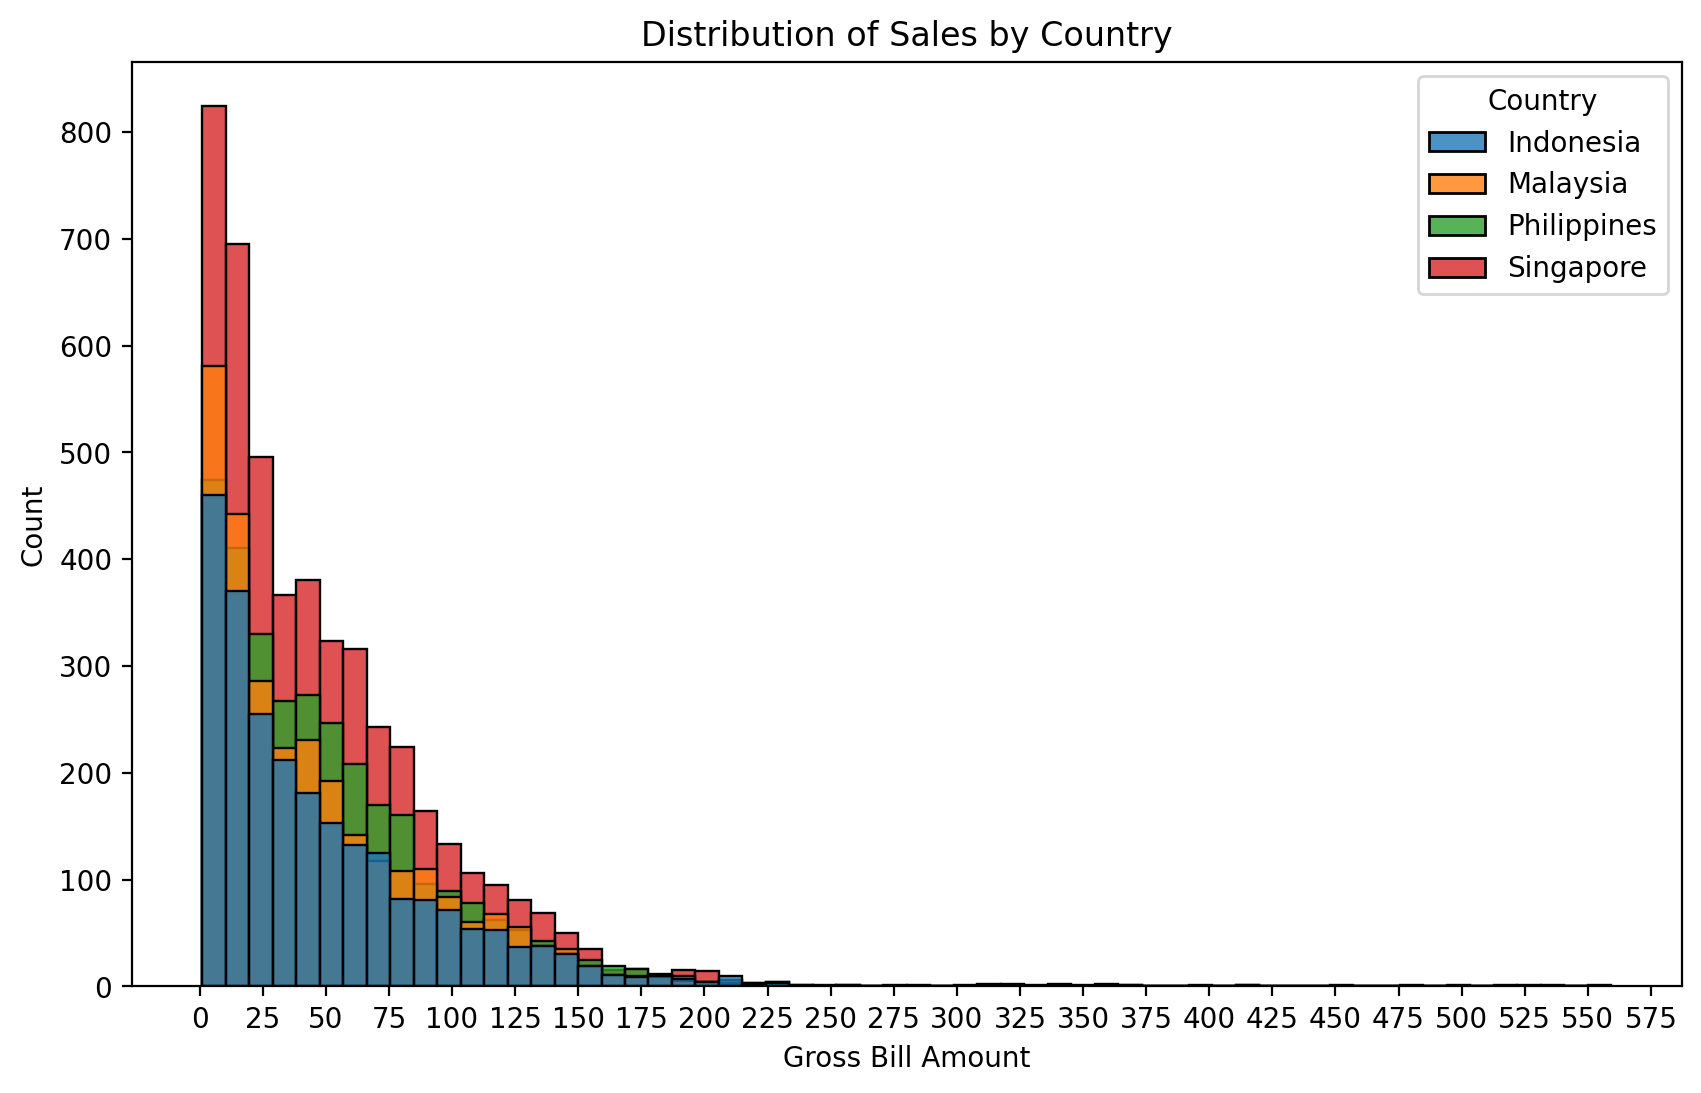

In [116]:
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(x='Gross Bill Amount', data=unique_receipts, hue='Country', bins=60, alpha=0.8)
plt.xticks(np.arange(0, 600, 25))
plt.title('Distribution of Sales by Country');

- The highest sales are observed in Singapore, and it is also worth paying attention to such a trend that most often the purchase amount is around 10 SGD and does not exceed 25 SGD.
- In addition, the bulk of the values falls between 0 and 225, but there are also outliers, up to 575 SGD.

Of course Singapore has the highest sales, but as for other countries, their histograms are quite similar. Is there statistically significant difference as for sales distribution between Indonesia and Malaysia or Malaysia and Philippines?

In [ ]:
malaysia = unique_receipts[(unique_receipts['Country'] == 'Malaysia')]
indonesia = unique_receipts[(unique_receipts['Country'] == 'Indonesia')]
philippines = unique_receipts[(unique_receipts['Country'] == 'Philippines')]

In [147]:
m1 = malaysia['Gross Bill Amount']
i1 = indonesia['Gross Bill Amount']
p1 = philippines['Gross Bill Amount']

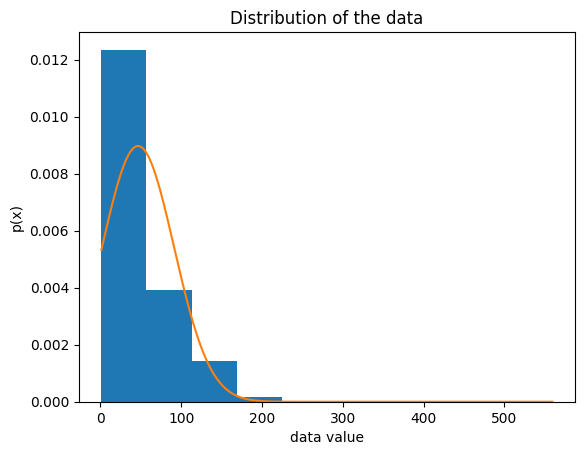

In [154]:
# checking for normality
x_axis = np.arange(m1.min(), m1.max(), 0.01)
plt.hist(m1, density=True)
plt.plot(x_axis, norm.pdf(x_axis, m1.mean(), m1.std()))
plt.title('Distribution of the data')
plt.xlabel('data value')
plt.ylabel('p(x)');

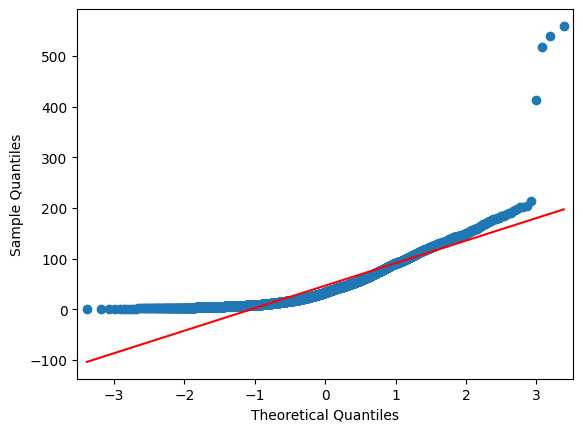

In [155]:
sm.qqplot(m1, line = 's');

In [156]:
statistic, pvalue = stats.shapiro(m1)
statistic, pvalue

(0.8108198642730713, 0.0)

As we can see from visualizations and Shapiro-Wilk test distribution is not normal. Therefore Mann-Whitney test will be used.

In [157]:
statistic, p_value = stats.mannwhitneyu(m1, i1, alternative='two-sided')
statistic, p_value

(3359247.0, 0.19590200280337322)

In [158]:
alpha = 0.05
if(p_value <  alpha):
    print("Reject Н0.")
else:
    print("Fail to reject Н0.")

Fail to reject Н0.


There's NO statistically significant difference as for sales distribution between Indonesia and Malaysia.

In [162]:
statistic, p_value = stats.mannwhitneyu(m1, p1, alternative='two-sided')
statistic, p_value

(4036948.5, 1.0380074756540508e-07)

In [160]:
alpha = 0.05
if(p_value <  alpha):
    print("Reject Н0.")
else:
    print("Fail to reject Н0.")

Reject Н0.


However, difference as for sales distribution between Malaysia and Philippines IS statistically significant.

**5.** Which city in Singapore had a bigger profit: Bedok or Woodlands?

In [6]:
singapore = xl1[(xl1['Country'] == 'Singapore')]

top_city = singapore.groupby('City')['Profit Margin'].agg(['sum', 'count', 'mean']).reset_index()

top_city

,City,sum,count,mean
0,Bedok,14649.59575,12272,1.193742
1,Woodlands,7489.29808,5924,1.264230


On the one hand, the profit turned out to be higher in Bedok. However, the mean is higher in Woodlands. That is, for the future, Woodlands is quite promising for increasing profits, if the store will manage to boost sales there.

**6.** Who made the most purchases: men or women?

In [277]:
xl1.groupby('Gender')['Receipt Number'].nunique()

Gender
Female    10788
Male       2260
Name: Receipt Number, dtype: int64

In general, women went shopping much more often than men. We can further analyze the data by Age Groups and Countries.

In [55]:
xl1.pivot_table(index='Gender', columns='Country', values='Receipt Number', aggfunc='nunique')

Country,Indonesia,Malaysia,Philippines,Singapore
Gender,,,,
Female,1950,2134,2391,4313
Male,469,702,703,386


As for women, they are the most frequent buyers in Singapore, while men are the most frequent buyers in the Philippines.

In [86]:
gender_age_group = xl1.pivot_table(index='Country', columns=['Age Group', 'Gender'], values='Receipt Number', aggfunc='nunique')
display(gender_age_group.style.background_gradient(axis=0))

However, if we look at Male gender at this more detailed breakdown, we can see that Malaysians are the most frequent buyers in most Age Groups, Filipinos prevail only in the 45-65 Group.

**7.** In which Category did women buy the most goods?

In [45]:
female_data = xl1[xl1['Gender'] == 'Female']

grouped_categories = xl1.groupby(['Country', 'Age Group', 'Category'])['QTY'].sum().reset_index()

top_f_categories = grouped_categories.loc[grouped_categories.groupby(['Country', 'Age Group'])['QTY'].idxmax()]

top_f_categories.pivot_table(index='Country', columns='Age Group', values='Category', aggfunc='first')

Age Group,15-18,18-35,35-45,45-65,65-75
Country,,,,,
Indonesia,Bakery & Breakfast,Frozen,Frozen,Frozen,Frozen
Malaysia,Bakery & Breakfast,Bakery & Breakfast,Frozen,Bakery & Breakfast,Bakery & Breakfast
Philippines,Bakery & Breakfast,Bakery & Breakfast,Frozen,Bakery & Breakfast,Beauty
Singapore,Bakery & Breakfast,Bakery & Breakfast,Bakery & Breakfast,Bakery & Breakfast,Frozen


- Women generally bought the most goods in the 'Bakery & Breakfast' category, followed by frozen products.
- In the age categories 15-18, 18-35, 45-65 women bought more pastries, while women aged 35-45 chose frozen products more often.
- Elderly Filipinas were the only ones, surprisingly, who bought more products in the ʼBeautyʼ category.
- Indonesian women mostly bought frozen products, while women in other countries mostly bought baked goods.
- As a whole women choose ready-made food or food that can be prepared relatively quickly as apparently most of them work and on top of that manage the household, so they don't have much time for cooking.

**8.** What are the top 5 most profitable Categories, Subcategories, Items, Brands?

In [49]:
profit_categories = xl1.groupby('Category')['Profit Margin'].sum().reset_index()

top_5_profcat = profit_categories.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profcat

,Category,Profit Margin
5,Frozen,9261.11848
1,Beauty,7989.95303
0,Bakery & Breakfast,6224.72130
13,Pet Care,4465.25015
6,Fruit & Vegetable,4388.17980


In [50]:
profit_subcategories = xl1.groupby('Sub_Category')['Profit Margin'].sum().reset_index()

top_5_profsub = profit_subcategories.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profsub

,Sub_Category,Profit Margin
34,Frozen Seafood,4682.09448
52,Oral Care,3659.47480
72,skin care,3304.07155
23,Dog Food & Trat,3246.56796
32,Frozen Fruits,2790.10479


In [58]:
profit_items = xl1.groupby('Items')['Profit Margin'].sum().reset_index()

top_5_profitems = profit_items.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profitems

,Items,Profit Margin
33,Ashai Lager Beer,1764.15428
72,Cascadian farm organic strawberries,1094.56347
20,Alpo Chicken pate dog food,995.04248
233,Lamb pate dog food,915.99124
161,Fresh Soyamilk,845.88239


In [11]:
xl1 = xl1.rename(columns={'Brand ': 'Brand'})

In [47]:
profit_brand = xl1.groupby('Brand')['Profit Margin'].sum().reset_index()

top_5_profbrand = profit_brand.sort_values(by='Profit Margin', ascending=False).head(5)

top_5_profbrand

,Brand,Profit Margin
17,Ashai,1764.15428
56,Cascadiam Farm,1215.07163
224,Nature's Gift,1121.38120
11,Alpo,1094.25288
38,BonJour,955.65339


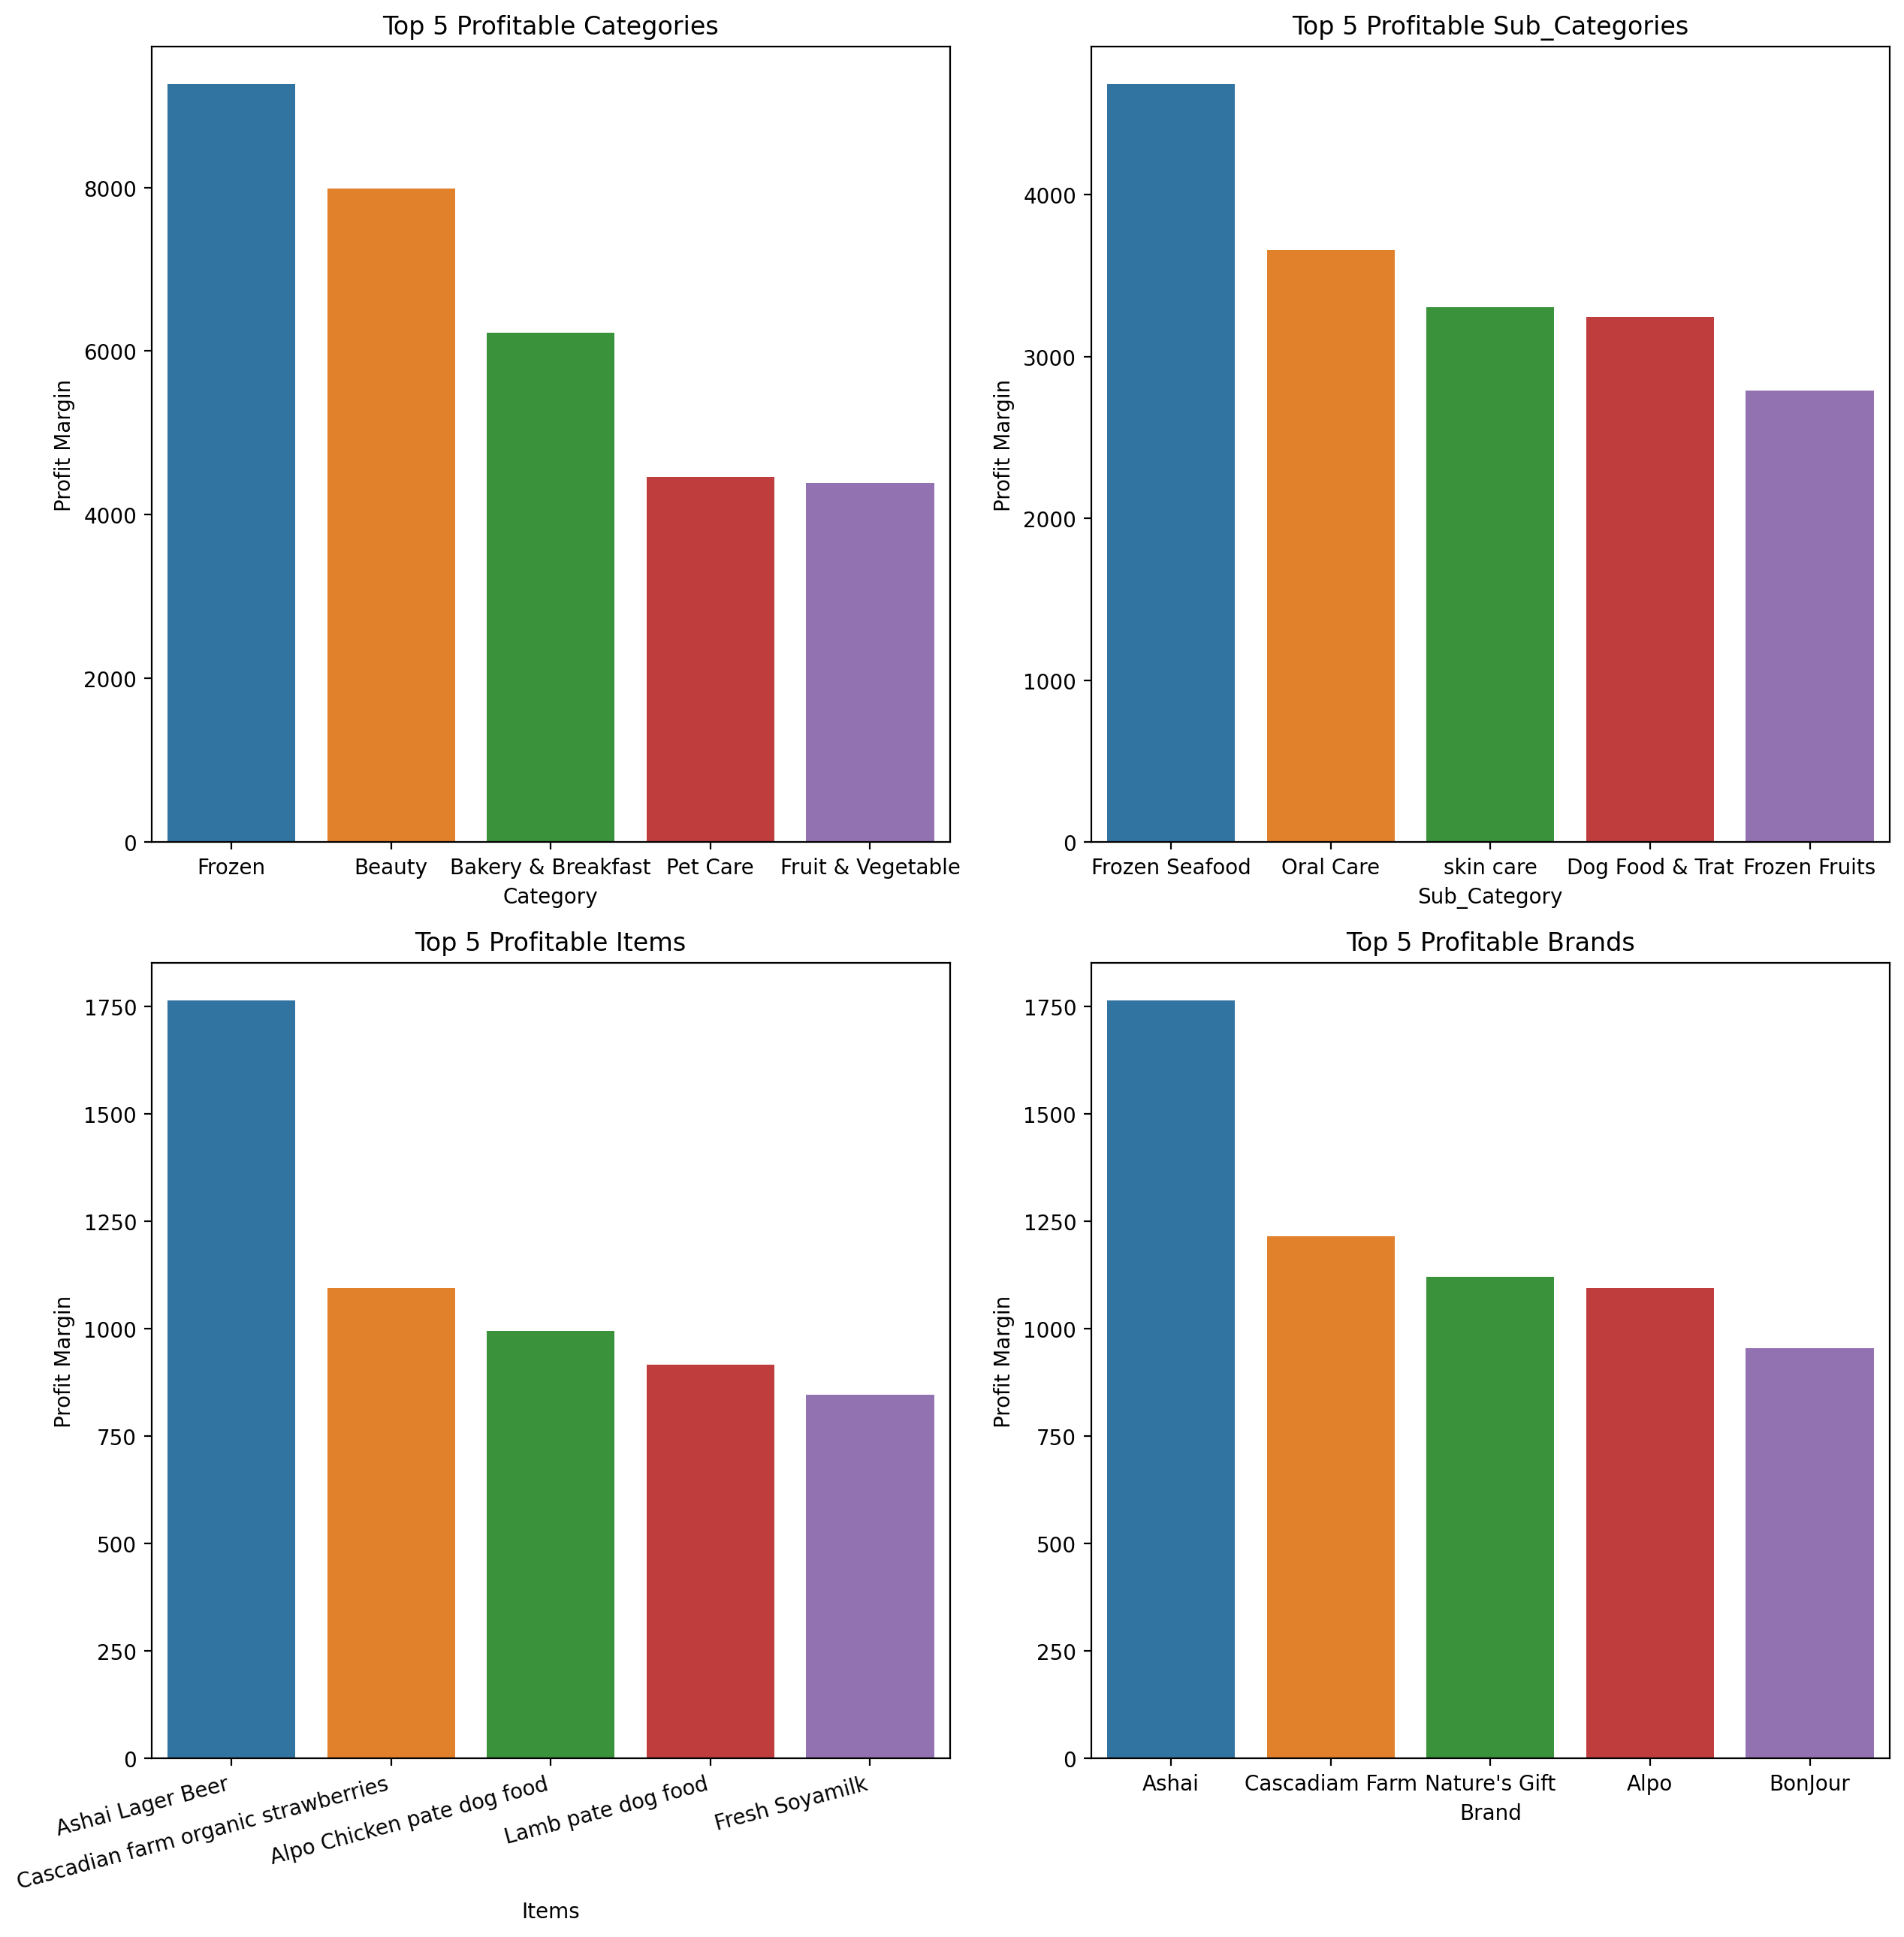

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13), dpi=200)

sns.barplot(x='Category', y='Profit Margin', data=top_5_profcat, ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Profitable Categories')

sns.barplot(x='Sub_Category', y='Profit Margin', data=top_5_profsub, ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Profitable Sub_Categories')

sns.barplot(x='Items', y='Profit Margin', data=top_5_profitems, ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Profitable Items')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15, ha='right')

sns.barplot(x='Brand', y='Profit Margin', data=top_5_profbrand, ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Profitable Brands')

plt.tight_layout();

- It is worth paying attention to the profitable categories and items, go deeper into their advertising and marketing strategies, discounts/promotions. 
- As for the brands, monitoring their new products and offering them to customers would be a good idea.

**9.** What payment methods are used most often in different countries, by men/women, by different age groups?

In [220]:
xl1.groupby('Payment Mode')['Receipt Number'].nunique()

Payment Mode
Card      4407
Cash      4248
Wallet    4393
Name: Receipt Number, dtype: int64

It can be seen that most purchases are paid for by card, although in general the spread of data is not so great, that is, all payment modes are used quite often.

In [88]:
gender_pay = xl1.pivot_table(index='Payment Mode', columns='Gender', values='Receipt Number', aggfunc='nunique')
display(gender_pay.style.background_gradient(axis=0))

Gender,Female,Male
Payment Mode,,
Card,3574,833
Cash,3482,766
Wallet,3732,661


It is interesting that women use an electronic wallet more often, while men prefer a card. Due to the fact that there are many more women buyers, it is worth paying attention to the development of special offers for the owners of such wallets.

In [89]:
age_pay = xl1.pivot_table(index='Payment Mode', columns='Age Group', values='Receipt Number', aggfunc='nunique')
display(age_pay.style.background_gradient(axis=0))

Age Group,15-18,18-35,35-45,45-65,65-75
Payment Mode,,,,,
Card,381,1756,1002,1106,82
Cash,498,1681,777,1034,167
Wallet,310,1712,936,1228,121


Teenagers and the elderly pay mostly with cash, young people - with a card, and e-wallets are most often used by people aged 45-65.

In [90]:
country_pay = xl1.pivot_table(index='Payment Mode', columns='Country', values='Receipt Number', aggfunc='nunique')
display(country_pay.style.background_gradient(axis=0))

Country,Indonesia,Malaysia,Philippines,Singapore
Payment Mode,,,,
Card,749,1002,1052,1604
Cash,875,821,1045,1507
Wallet,795,1013,997,1588


The least advanced in terms of modern payment methods is Indonesia, because cash is most often used here, and this fact should be taken into account when opening new stores in this country. Malaysians mostly use an electronic wallet. Filipinos and Singaporeans prefer cards.

**10.** What are the most common shopping hours in each country?

In [65]:
xl1['Hour'] = xl1['Time'].apply(lambda x: x.hour)

In [66]:
xl1.groupby('Hour')['Receipt Number'].nunique()

Hour
10    1109
11    1049
12    1106
13    1153
14    1075
15    1112
16    1088
17    1071
18    1099
19    1123
20    1154
21    1123
Name: Receipt Number, dtype: int64

As a whole purchases were mostly made at 8 p.m.

In [91]:
hour_country = xl1.pivot_table(index='Hour', columns='Country', values='Receipt Number', aggfunc='nunique')
display(hour_country.style.background_gradient(axis=0))

Country,Indonesia,Malaysia,Philippines,Singapore
Hour,,,,
10,221,268,227,393
11,200,241,239,369
12,218,228,249,411
13,213,272,256,412
14,186,224,232,433
15,218,234,280,380
16,188,239,276,385
17,191,222,259,399
18,193,229,280,397


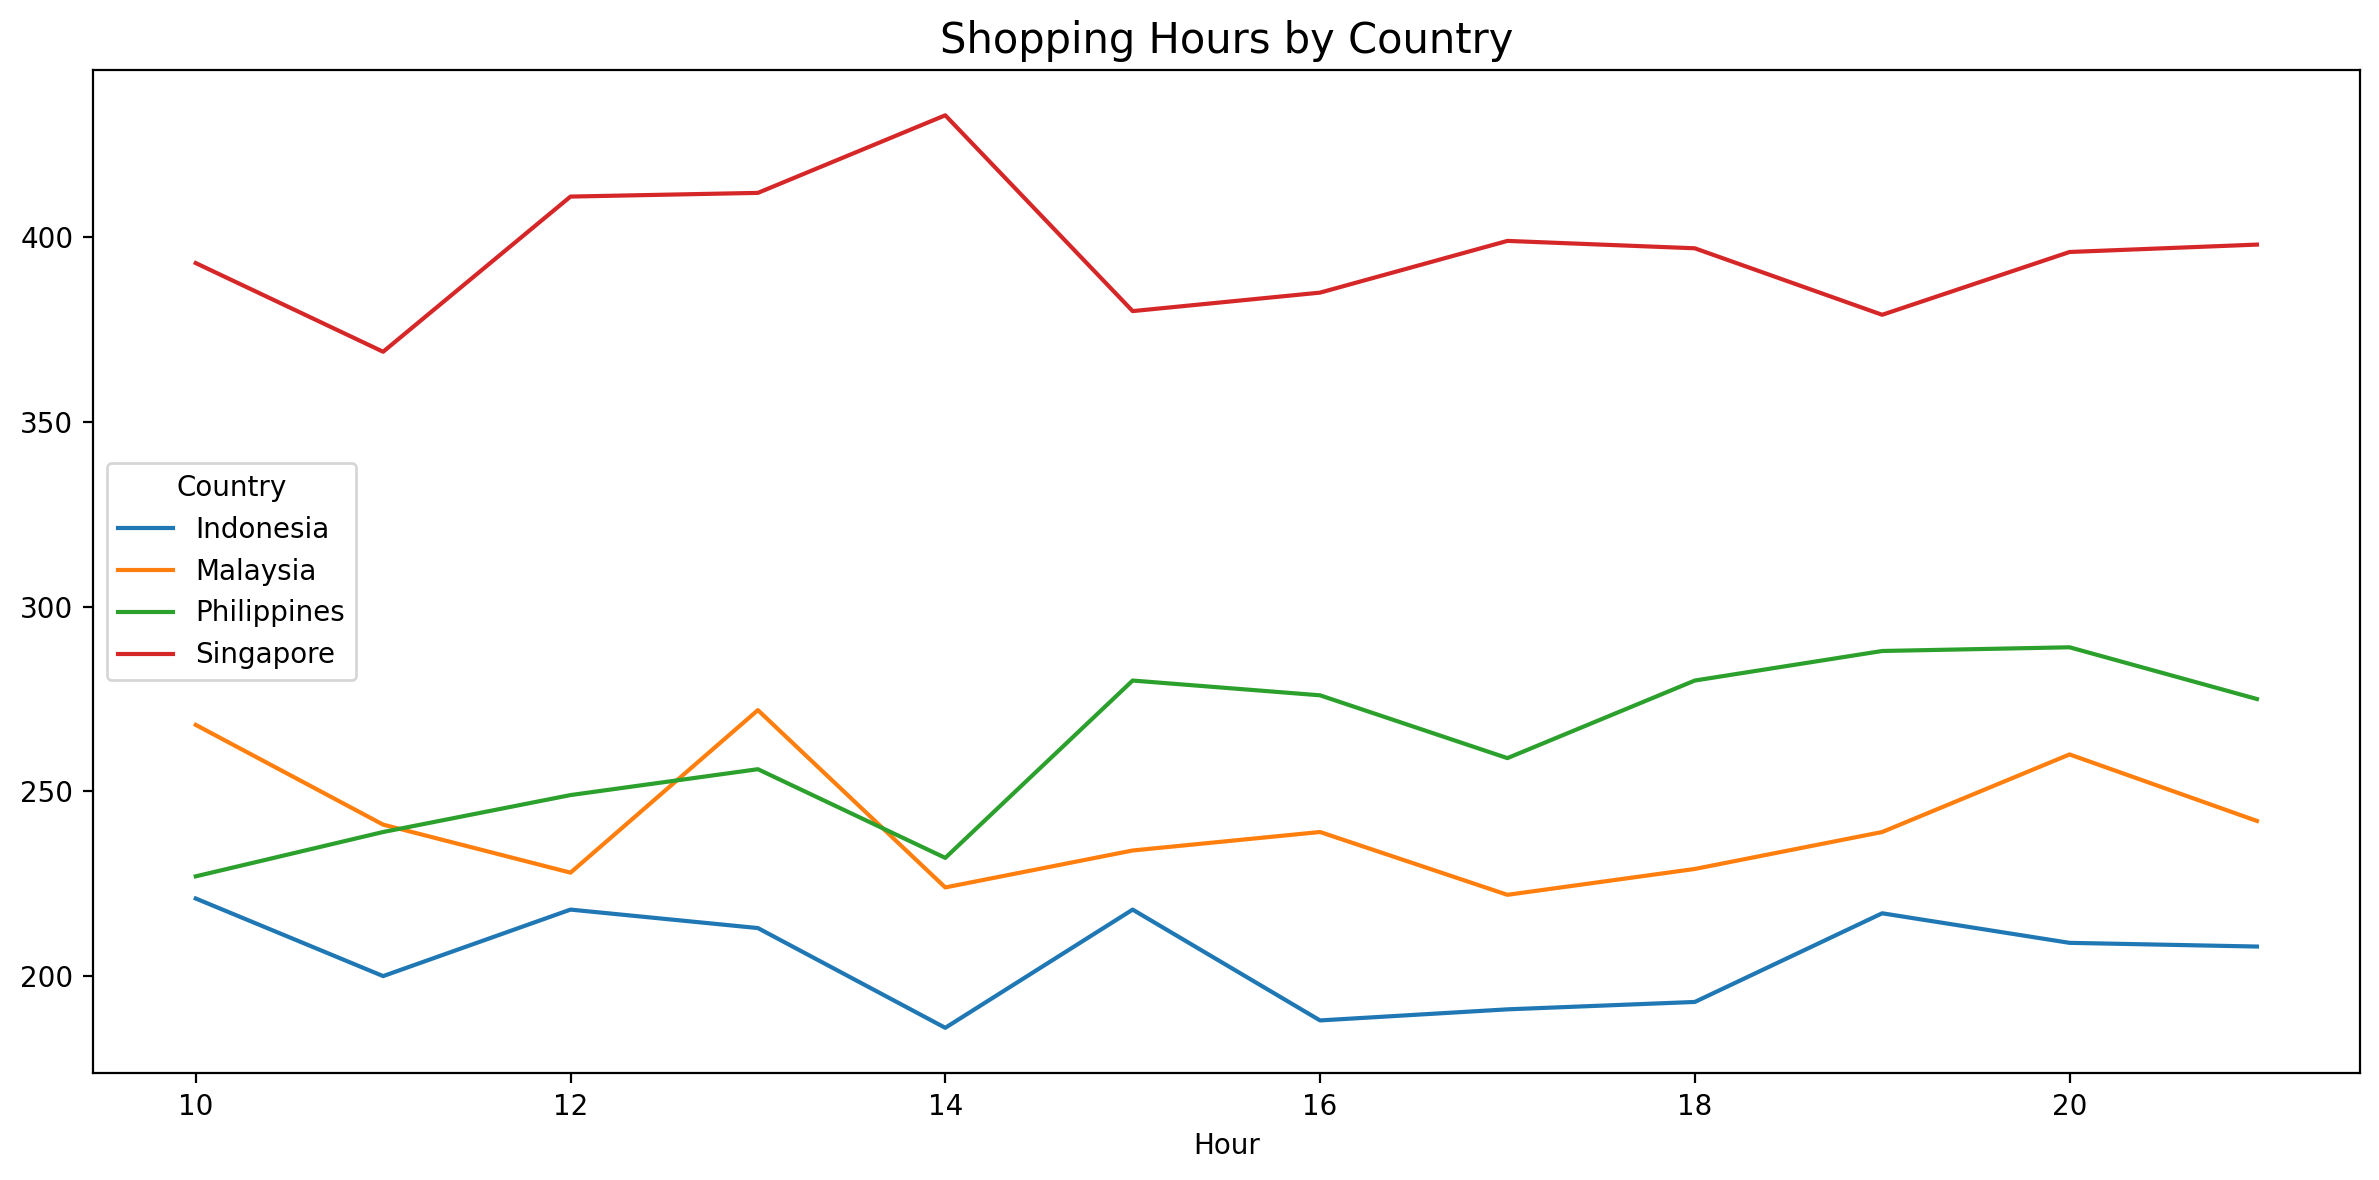

In [81]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
hour_country.plot(ax=ax)
plt.title('Shopping Hours by Country', fontsize=15)
plt.tight_layout();

However, the situation is somewhat different in each country, namely, in Singapore and Malaysia, purchases were mostly made at lunchtime, in Indonesia - in the morning, and in the Philippines - in the evening. Thus, each country has its own peculiarities regarding the behavior of clients, which should be paid attention to when building a strategy for development and expansion in different countries.

**11.** In which month of 2019 and on which days of this month was the highest profit for stores in Singapore?

In [73]:
countries_2019 = xl1[(xl1['Year'] == 2019)]

In [74]:
pivot_countries_19 = countries_2019.pivot_table(index='Month', columns='Country', values='Profit Margin', aggfunc='sum')

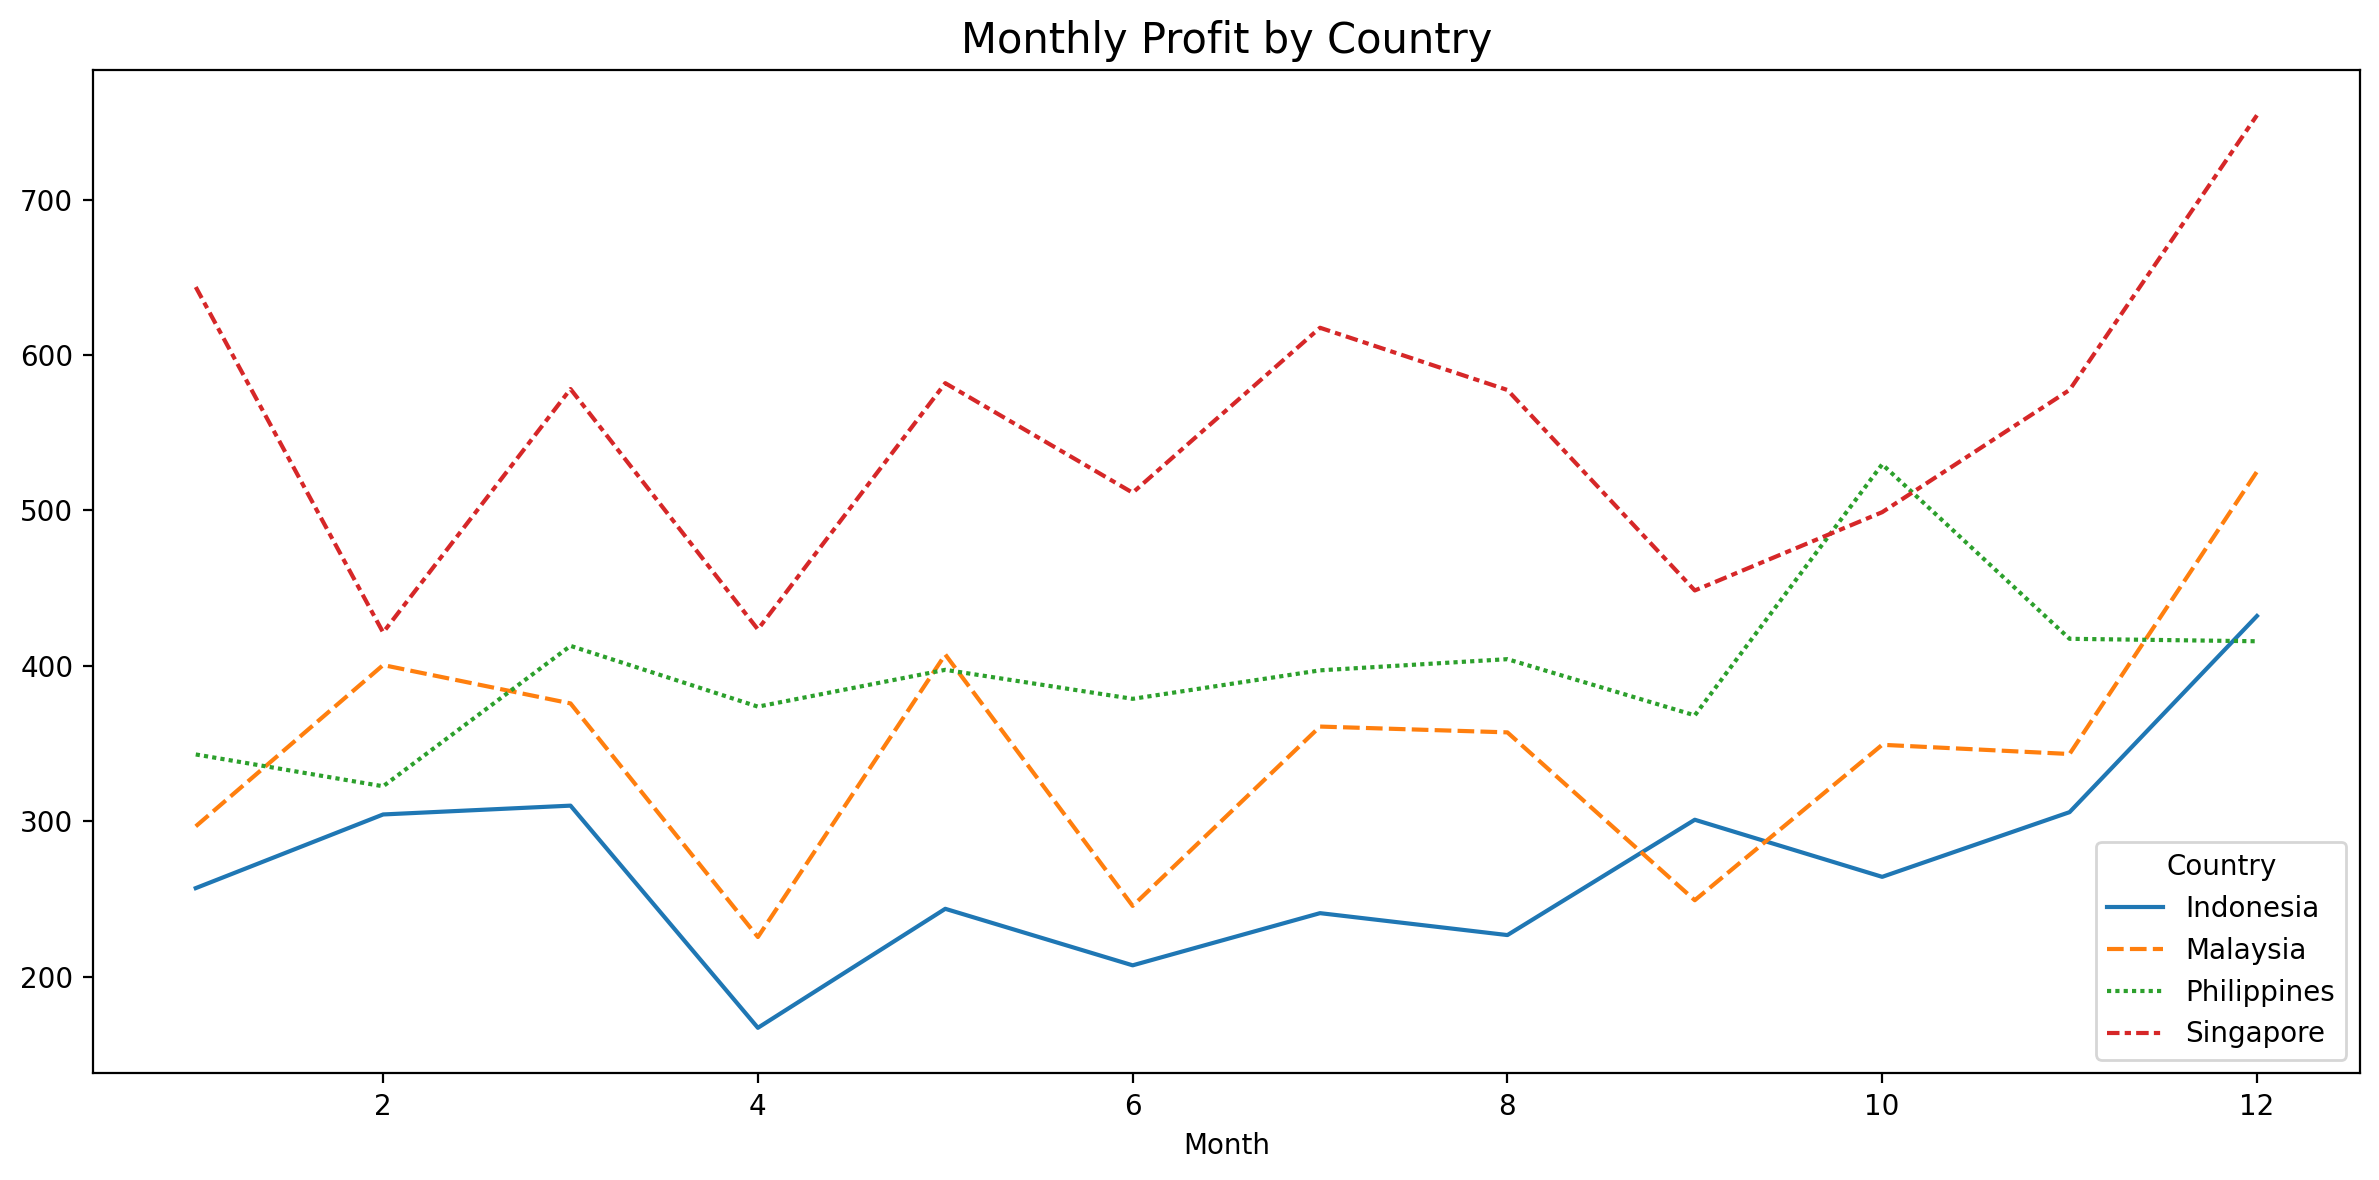

In [76]:
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=pivot_countries_19)
plt.title('Monthly Profit by Country', fontsize=15)
plt.tight_layout();

The lineplot clearly shows that the biggest profit in Singapore, as well as in Malaysia and Indonesia, was in December. Only in the Philippines was October the most profitable month.

In [78]:
singapore_2019_12 = countries_2019[(countries_2019['Month'] == 12) & (countries_2019['Country'] == 'Singapore')]

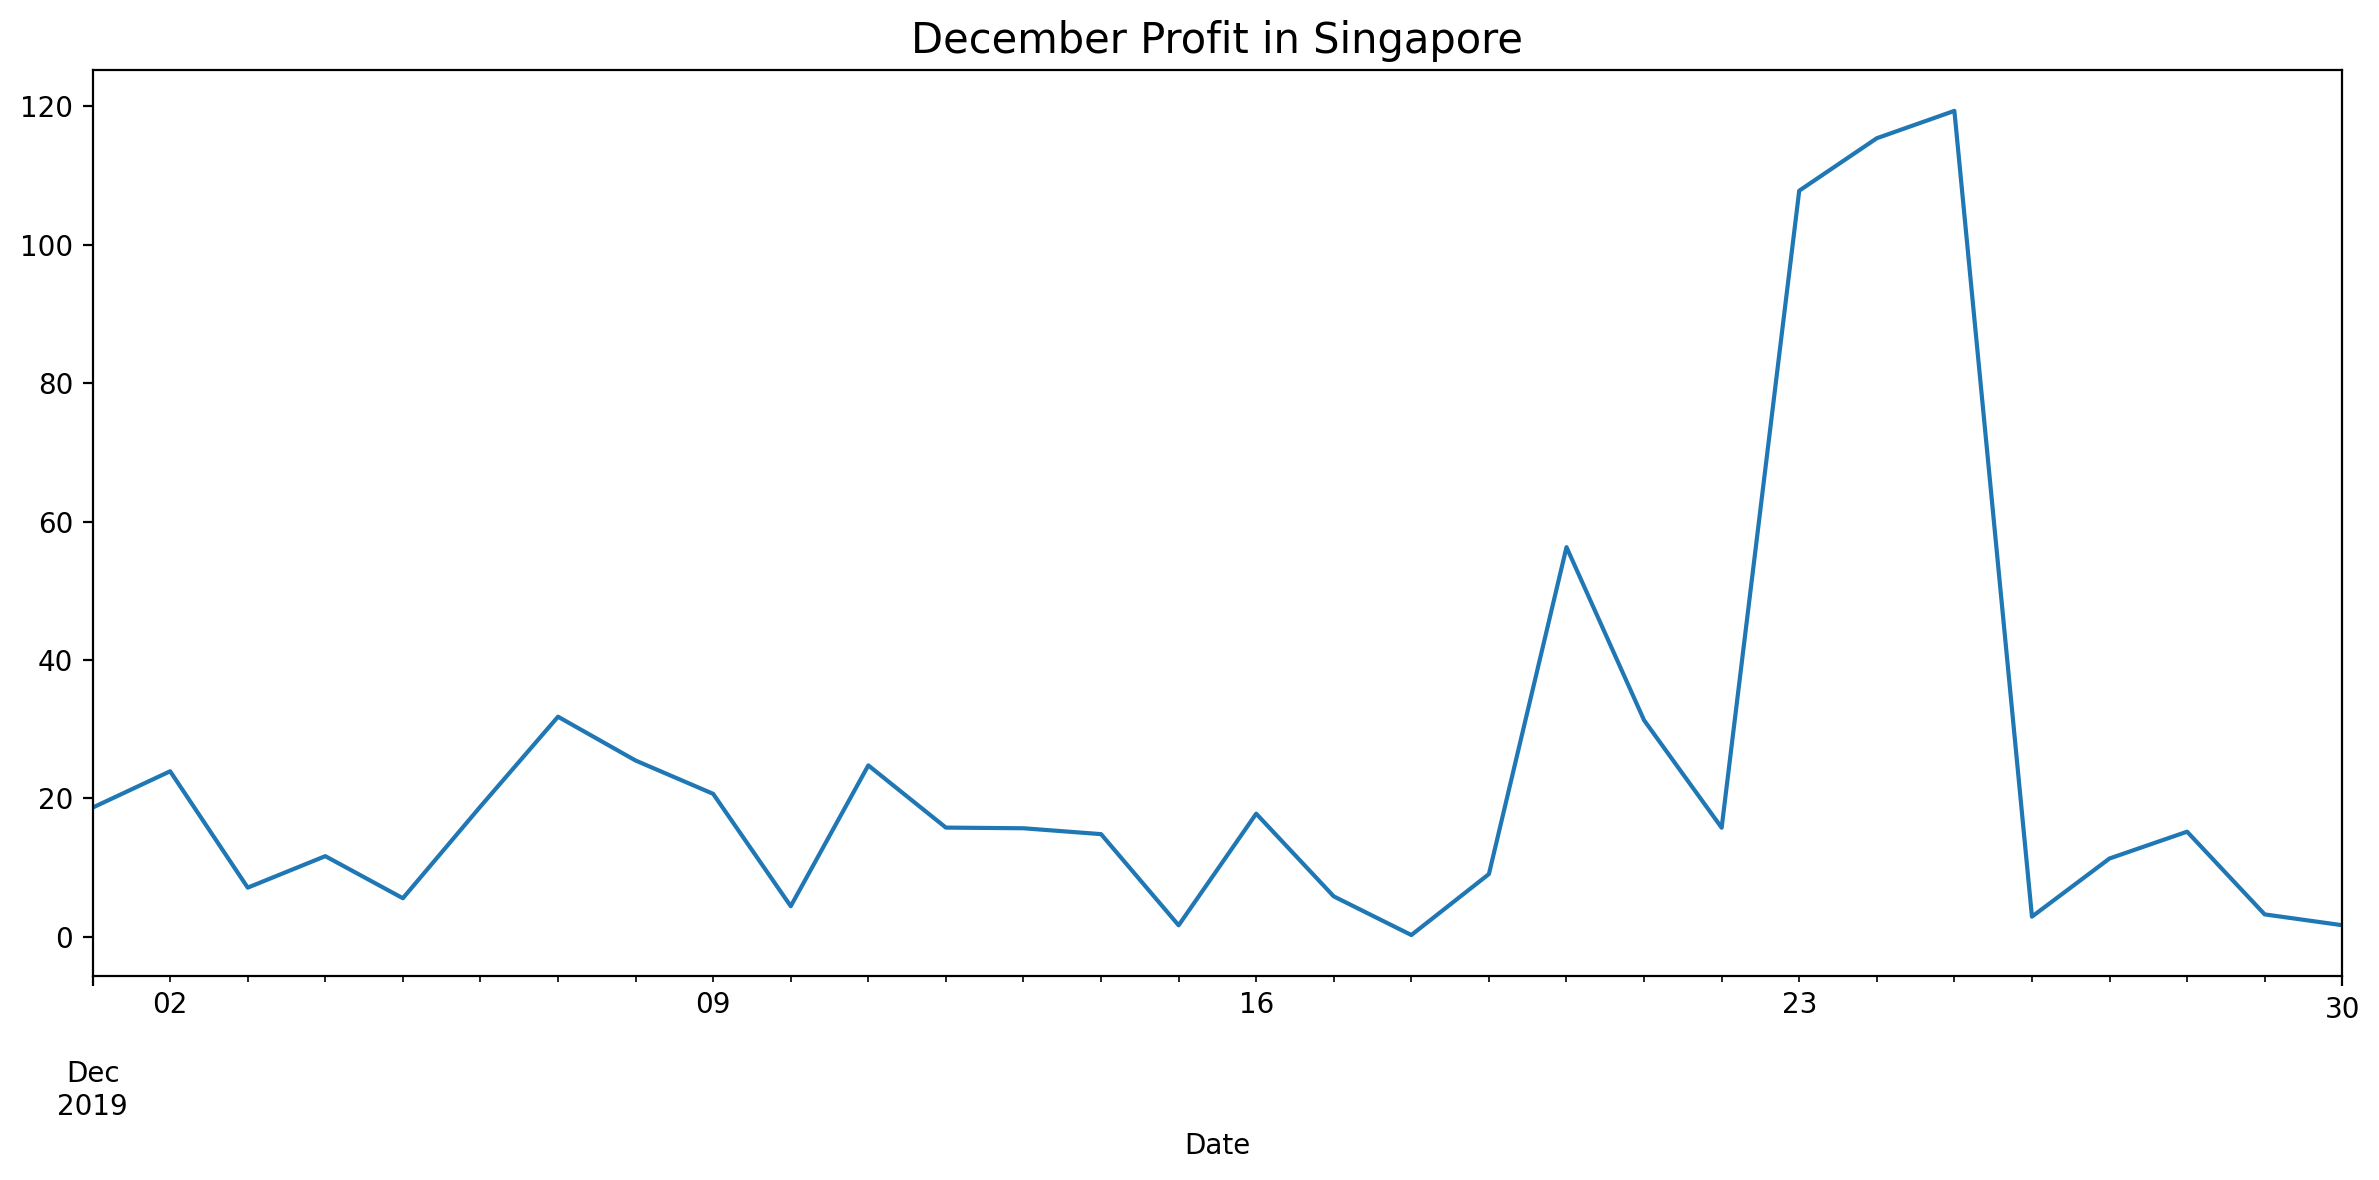

In [79]:
plt.figure(figsize=(12, 6), dpi=200)
singapore_2019_12.groupby(singapore_2019_12['Date'])['Profit Margin'].sum().plot()
plt.title('December Profit in Singapore', fontsize=15)
plt.tight_layout();

The highest profit in Singapore was from 23 to 25 December 2019. Singaporeans love to celebrate Christmas, so it is not surprising that this month and these days are the most profitable for stores in this country. 